# Text & Natural Language Processing

In [1]:
%cd '/Users/Vincent/Desktop/Python/DataCamp/Data'
import pandas as pd
import numpy as np
import re

import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

import matplotlib.pyplot as plt
%matplotlib inline

/Users/Vincent/Desktop/Python/DataCamp/Data


In [2]:
my_string = "I am eager to learn about NLP as it is such an important field!"\
    "It's interdisciplinary nature makes it particularly interesting. - March 2020"

# Split my_string on sentence endings 
sentence_endings = r"[.?!]"
print(re.split(sentence_endings, my_string))

# Find all capitalized words
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split on spaces
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits
digits = r"\d+"
print(re.findall(digits, my_string))

['I am eager to learn about NLP as it is such an important field', "It's interdisciplinary nature makes it particularly interesting", ' - March 2020']
['NLP', 'It', 'March']
['I', 'am', 'eager', 'to', 'learn', 'about', 'NLP', 'as', 'it', 'is', 'such', 'an', 'important', "field!It's", 'interdisciplinary', 'nature', 'makes', 'it', 'particularly', 'interesting.', '-', 'March', '2020']
['2020']


# Tokenization

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize

myfile = open("Monty_python.rtf")
scene_one = str(myfile.readlines())

# Split scene_one into sentences
sentences = sent_tokenize(scene_one)

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))
print("Scene 1 consists of {} unique tokens".format(len(unique_tokens)))

Scene 1 consists of 235 unique tokens


In [4]:
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

# Find hashtags
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print("Hashtags: {}".format(hashtags))

# Mentions
pattern2 = r"([@]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print("Mentions: {}".format(mentions_hashtags))

# Tokenize all tweets
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print("Tokens: {}".format(all_tokens))

Hashtags: ['#nlp', '#python']
Mentions: ['@datacamp']
Tokens: [['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


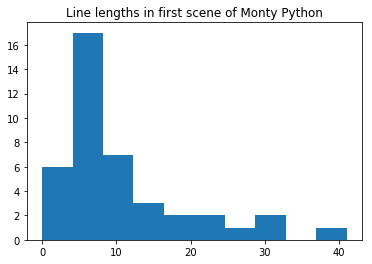

In [5]:
# Split the script into lines
lines = scene_one.split('\\\\n')

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, '\w+') for s in lines]

# Make a frequency list of lengths
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)
plt.title("Line lengths in first scene of Monty Python")
plt.show()

## Bag-of-words

In [6]:
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

myfile = open("article.rtf")
article = str(myfile.readlines())

tokens = word_tokenize(article)

# lower-case tokens
lower_tokens = [t.lower() for t in tokens]
# Retain alphabetic words
alpha_only = [t for t in lower_tokens if t.isalpha()]
# Remove all stop words
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

bow = Counter(lemmatized)

# 10 most common tokens after preprocessing
print(bow.most_common(10))

[('debugging', 28), ('system', 23), ('software', 16), ('computer', 14), ('bug', 14), ('problem', 14), ('tool', 13), ('process', 12), ('term', 12), ('used', 12)]


# Multiple files: from dictionary to corpus

In [7]:
# read in multiple files (partially in this case -> readline() instead of readlines on purpose)
import glob
txt_files = glob.glob("Wikipedia articles/*.txt")

for file, i in zip(txt_files, range(len(txt_files))):
    with open(file) as textfile:
        txt_files[i] = textfile.readline()

In [8]:
# preprocess all the files
document_tokens=[]

for file, i in zip(txt_files, range(len(txt_files))):
    
    tokens = word_tokenize(file)

    # lower-case tokens
    lower_tokens = [t.lower() for t in tokens]
    # Retain alphabetic words
    alpha_only = [t for t in lower_tokens if t.isalpha()]
    # Remove all stop words
    no_stops = [t for t in alpha_only if t not in stopwords.words('english')]
    
    document_tokens.append(no_stops)

In [9]:
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict
import itertools

# Create a Dictionary from the tokens
dictionary = Dictionary(document_tokens)

# Create a corpus
corpus = [dictionary.doc2bow(tokens) for tokens in document_tokens]

# retrieve total word counts 
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
    
# Create a sorted list of word counts
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# top 10 words across all documents
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

computer 8
language 6
process 5
programming 5
use 5


# Tfidf

In [10]:
from gensim.models.tfidfmodel import TfidfModel

# pick a specific document from corpus
doc = corpus[2]

# Create tfidf model for the corpus
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of the selected document
tfidf_weights = tfidf[doc]

# Sort the weights from highest to lowest
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

language 0.4405507941373373
programming 0.3524406353098698
abstraction 0.24439164223150917
may 0.24439164223150917
science 0.24439164223150917


# Named Entity Recognition

In [19]:
myfile = open("article_uber.rtf")
article = str(myfile.readlines())

# Tokenize the article into sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

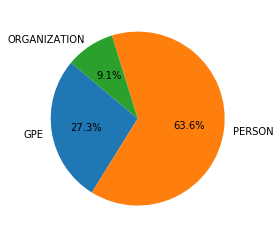

In [20]:
# Create the defaultdict
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

In [21]:
import spacy

# Instantiate an English model
nlp = spacy.load("en_core_web_sm",tagger=False,parser=False,matcher=False)

# Create a new document
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

PERSON Uber
PERSON Uber
ORG unroll.me
ORG Apple
ORG Uber
PERSON Travis Kalanick
PERSON Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley's
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


# Scikit-learn tools

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_csv("fake_or_real_news.csv")
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

#-----------------------------
#       CountVectorizer
#-----------------------------
count_vectorizer = CountVectorizer(stop_words='english')

# Transform and fit the training data using only the 'text' column values
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test data using only the 'text' column values
count_test = count_vectorizer.transform(X_test)

count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

#-----------------------------
#      TfidfVectorizer
#-----------------------------
# Initialize a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)

# Transform and fit the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train,y_train)
# Transform the test data
tfidf_test = tfidf_vectorizer.transform(X_test)

tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Calculate the difference in columns
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

set()
False


In [33]:
# -> Check what implications these differences have in classification performance
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

#-----------------------------
#       CountVectorizer
#-----------------------------
nb_classifier.fit(count_train, y_train)

# Accuracy
pred = nb_classifier.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print(score)

# confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

#-----------------------------
#      TfidfVectorizer
#-----------------------------
nb_classifier.fit(tfidf_train, y_train)

# Accuracy
pred = nb_classifier.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(score)

# confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.893352462936394
[[ 865  143]
 [  80 1003]]
0.8565279770444764
[[ 739  269]
 [  31 1052]]


In [35]:
# Tune the hyperparameter alpha to improve results
alphas = np.arange(0.5,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.5
Score:  0.8842659014825442

Alpha:  0.6
Score:  0.874701099952176

Alpha:  0.7
Score:  0.8703969392635102

Alpha:  0.7999999999999999
Score:  0.8660927785748446

Alpha:  0.8999999999999999
Score:  0.8589191774270684

